In [ ]:
import seaborn as sns
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df  = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date']).dt.month
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x)if pd.notna(x) else(x))

In [2]:
df_us = df[df['job_country'] == 'United States']
df_skills = df_us.explode('job_skills')
df_skills[['job_title', 'job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,None
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,None
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


In [3]:
df_skill_count = df_skills.groupby(['job_skills','job_title_short']).size().reset_index(name='skill_count')
# df_skill_count.reset_index(name='skill_count')
df_skill_count.sort_values(by='skill_count',ascending=False,inplace = True)

In [4]:
job_titles = df_skill_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

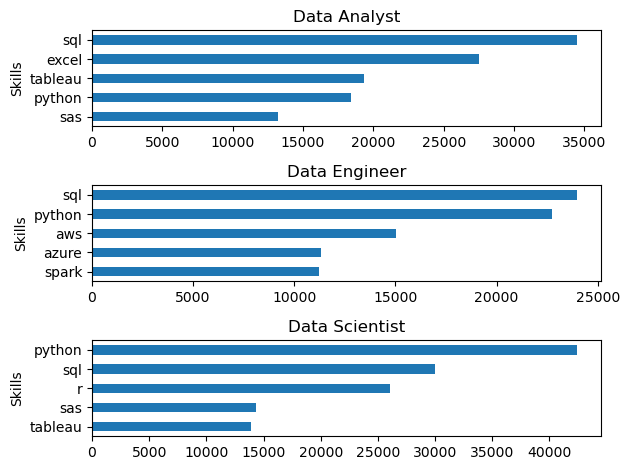

In [5]:
fig,ax = plt.subplots(len(job_titles),1)

for i , job_title in enumerate(job_titles):
    df_plot = df_skill_count[df_skill_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh',x='job_skills',y='skill_count',ax=ax[i],title=job_title)

    ax[i].invert_yaxis()
    ax[i].set_ylabel('Skills')
    ax[i].legend().remove()
plt.tight_layout()
plt.show()

In [6]:
df_job_title_count = df_us['job_title_short'].value_counts().reset_index(name='jobs_total')

In [7]:
df_skill_perc = pd.merge(df_skill_count,df_job_title_count,how='left',on='job_title_short')

df_skill_perc['skill_percent'] = 100 * df_skill_perc['skill_count']/df_skill_perc['jobs_total']

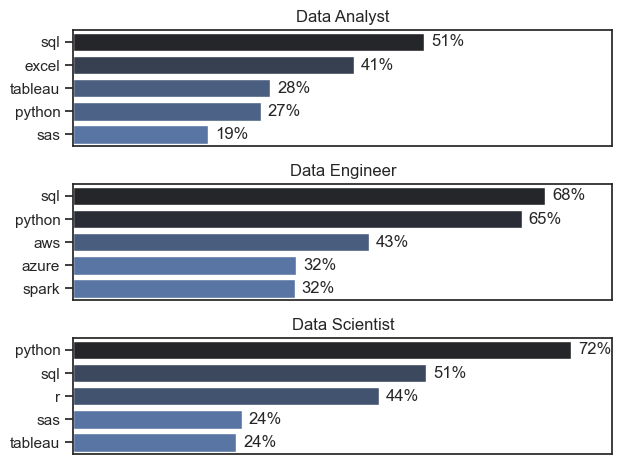

In [9]:
fig,ax = plt.subplots(len(job_titles),1)

for i , job_title in enumerate(job_titles):
    df_plot = df_skill_perc[df_skill_perc['job_title_short'] == job_title].head(5)

    sns.barplot(data=df_plot,x='skill_percent',y='job_skills',ax=ax[i],hue='skill_count',color='blue',palette = 'dark:b_r')
    sns.set_theme(style='ticks')
    ax[i].set_title(job_title)

    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0,78)
    ax[i].legend().set_visible(False)

    #looping through the index to show the skill perecentage
    for n ,v  in enumerate(df_plot['skill_percent']):
      ax[i].text(v + 1,n,f'{v:.0f}%', va='center')

    if i != len(job_titles) - 1:
      ax[i].set_xticks([])

      #setting the xticks to remove the x axis numbers
    ax[i].set_xticks([])
plt.tight_layout()
plt.show()